In [6]:
conda install shapely

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [7]:
%matplotlib inline
from scipy.integrate import odeint  
import numpy as np
from matplotlib import pyplot as plt
from shapely.geometry import LineString

In [8]:
#Reduced model simulation highP1/lowP2

def sdot_toggle(s,t,params):
    # define parametres and variables
    P1, P2 = s
    kp1, kp2, kdp1, kdp2, K1, K2, n1, n2, kbm1, kbm2 = params
    
    # define ODE rate equations
    rate_P1_production = kp1 * ((K2**n2)/(P2**n2 + K2**n2)) + kbm2
    rate_P2_production = kp2 * ((K1**n1)/(P1**n1 + K1**n1)) + kbm1
    rate_P1_loss = -kdp1*P1
    rate_P2_loss = -kdp2*P2
    dP1 = rate_P1_production + rate_P1_loss
    dP2 = rate_P2_production + rate_P2_loss
    dsdt = [dP1, dP2]
    return dsdt


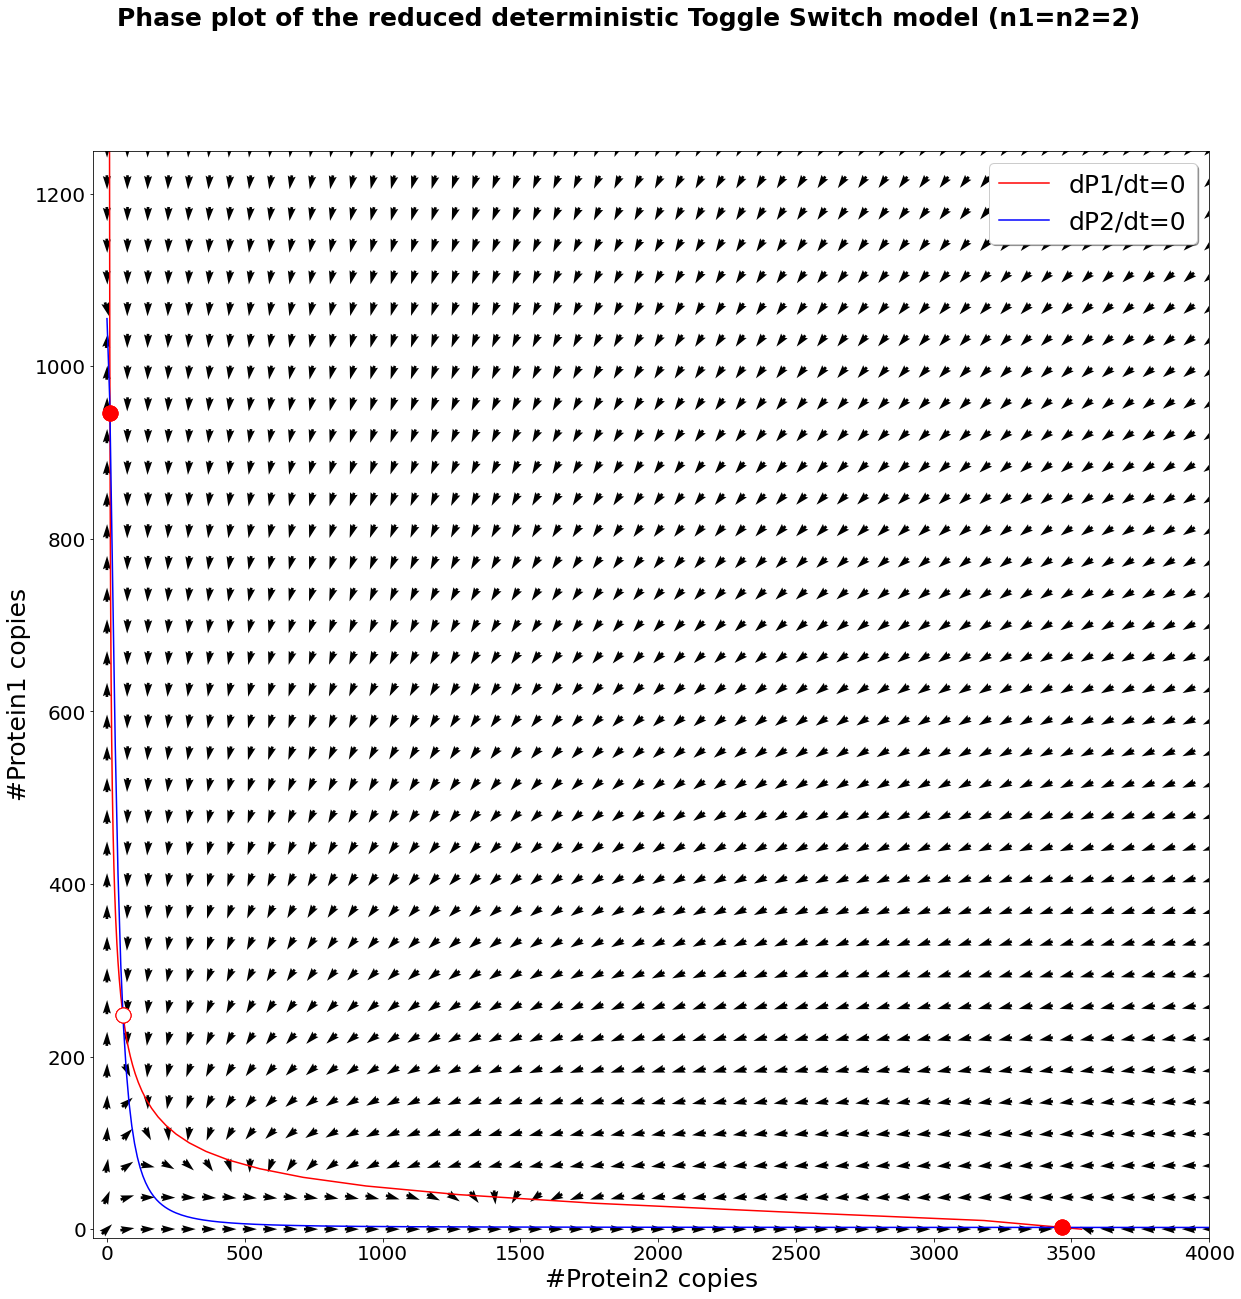

In [9]:
from helper_functions import *
# imports the direction_field function 

# DEFINE INITIAL CONDITIONS AND PARAMETERS
# values chosen fits with the deterministic model

#params
kp1= 58.24
kp2= 17.38
kdp1 = 0.0165
kdp2 = 0.0165
K1 = 31.94
K2 = 30.0
n1 = 2.0
n2 = 2.0
kbm1=0.032
kbm2=0.119
params = [kp1, kp2, kdp1, kdp2, K1, K2, n1, n2, kbm1, kbm2]

# define list of observation points 't_obs'
t_start = 0
t_end = 1000
n_obs = 1000
t_obs = np.linspace(t_start, t_end, n_obs)

#time points
t_start = 0
t_end = 10000
n_obs = 4000
t_obs = np.linspace(t_start, t_end, n_obs)

# make figure that the results will be plotted into
fig = plt.figure(figsize=(20,20))
fig.suptitle('Phase plot of the reduced deterministic Toggle Switch model (n1=n2=2) ', 
              fontsize=25, fontweight='bold')
ax = fig.add_subplot(1,1,1)
ax.set_xlim(-50,4000)
ax.set_ylim(-10,1250)

# Draw direction field onto the plot
draw_direction_field(ax,sdot_toggle,params,normalise=True)

# Calculate the conditions for dP1/dt=0 (nullclines of P1)
P2_vals = np.linspace(0,10000,1000)
P1_vals = []
for P2 in P2_vals:
    P1_ss = (kp1 * ((K2**n2)/(((P2**n2 + K2**n2)))) + kbm2)/(kdp1)
    P1_vals.append(P1_ss)

    s0 = [P1_ss, P2]

P1_nullcline_P1_vals = P1_vals    # x vals
P1_nullcline_P2_vals = P2_vals   # y vals

# Calculate the conditions for dP2/dt=0 (nullclines of P2)
P1_vals = np.linspace(0,10000,1000)
P2_vals = []
for P1 in P1_vals:
    P2_ss = (kp2 * (K1**n1)/(((P1**n1 + K1**n1))) + kbm1)/(kdp2)
    P2_vals.append(P2_ss)

    s0 = [P2_ss, P1]

P2_nullcline_P1_vals = P1_vals   # x vals
P2_nullcline_P2_vals = P2_vals    # y vals

# Plot nullclines
ax.plot(P1_nullcline_P1_vals, P1_nullcline_P2_vals, 'r-', label='dP1/dt=0')
ax.plot(P2_nullcline_P1_vals, P2_nullcline_P2_vals, 'b-', label='dP2/dt=0')

# Plot intersections
first_line = LineString(np.column_stack((P1_nullcline_P1_vals, P1_nullcline_P2_vals)))
second_line = LineString(np.column_stack((P2_nullcline_P1_vals, P2_nullcline_P2_vals)))
intersection = first_line.intersection(second_line)

for i in range(len(intersection)):
    ax.plot(*intersection[0].xy, 'ro', markersize = '15')
    ax.plot(*intersection[1].xy, 'ro', markerfacecolor='w', markersize = '15')
    ax.plot(*intersection[2].xy, 'ro', markersize = '15')

# Define plot axes
ax.legend(loc = 1, prop={'size': 25}, shadow=True)
ax.set_xlabel('#Protein2 copies')
ax.set_ylabel('#Protein1 copies')
ax.xaxis.label.set_size(25)
ax.yaxis.label.set_size(25)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

plt.savefig('phase_plot_basal.png');